# Assignment on Spam email classification

## Importing Libraries and Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.tag import pos_tag
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb 
import xgboost as xgb
from wordcloud import WordCloud, STOPWORDS
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data = pd.read_csv('/content/spam.csv',encoding='latin-1')
data
print(data.isnull().values.sum(axis=0))

[   0    0 5522 5560 5566]


In [ ]:
data.drop(columns= ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis= 1, inplace= True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.columns = ['label', 'mail']
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

In [ ]:
from string import punctuation
from nltk.corpus import stopwords
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
corpus = data['mail'].tolist()
len(corpus)

5572

In [ ]:
final_corpus = []
for i in range(len(corpus)):
  word = word_tokenize(corpus[i].lower())
  word = [stemmer.stem(y) for y in word if y not in stuff_to_be_removed]
  j = " ".join(word)
  final_corpus.append(j)

"""final_corpus"""

'final_corpus'

In [ ]:
label_list=data['label'].tolist()
newdf = pd.DataFrame(final_corpus)
newdf['label'] = label_list
newdf.columns=['mail','label']
newdf

,mail,label
0,go jurong point crazy.. avail bug n gre world ...,0
1,ok lar ... jok wif u on ...,0
2,fre entry 2 wkly comp win fa cup fin tkts 21st...,1
3,u dun say ear hor ... u c already say ...,0
4,nah n't think goe usf liv around though,0
...,...,...
5567,2nd tim tri 2 contact u. u å£750 pound priz 2 ...,1
5568,ì_ b going esplanad fr hom,0
5569,pity mood ... suggest,0
5570,guy bitch act lik 'd interest buy someth els n...,0


In [ ]:
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(newdf['mail'])
x = vector.toarray()
y= newdf['label']
print(x.shape)

(5572, 6986)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True, test_size = 0.2)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(4457, 6986) (1115, 6986)
(4457,) (1115,)


## Base Model

**We look at *RECALL* rather than precision here**

In [ ]:
print('Multinomial Naive Bayes')
ab = MultinomialNB()
ab.fit(x_train,y_train)
ypred = ab.predict(x_test)
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

print('Linear Support Vector Classification')
svc = LinearSVC().fit(x_train,y_train)
y_pred = svc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

print('Random Forest Classifier')
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

print('Light Gradient Boosting Machine Classifier')
clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)  
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

print('Extreme Gradient Boosting Classfier')
clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)  
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Multinomial Naive Bayes
0.9551569506726457
[[934   0]
 [ 50 131]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       934
           1       1.00      0.72      0.84       181

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.91      1115
weighted avg       0.96      0.96      0.95      1115

Linear Support Vector Classification
0.9766816143497757
[[934   0]
 [ 26 155]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       934
           1       1.00      0.86      0.92       181

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Random Forest Classifier
0.9695067264573991
[[934   0]
 [ 34 147]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       934
           1       1.00  

## Word Clouds

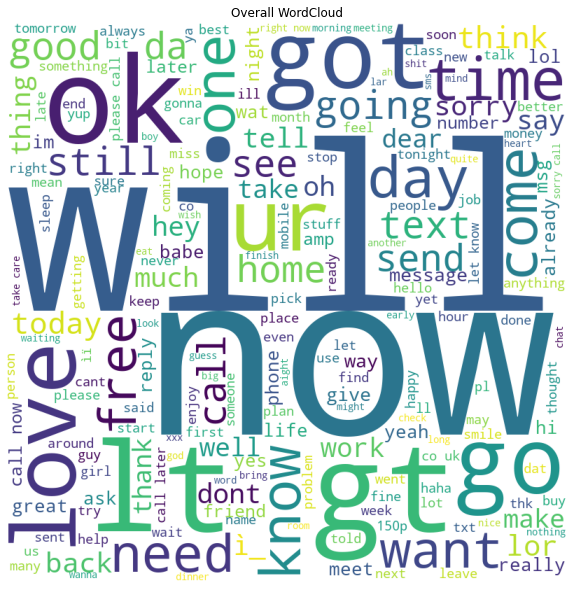

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in data.mail: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title('Overall WordCloud')
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

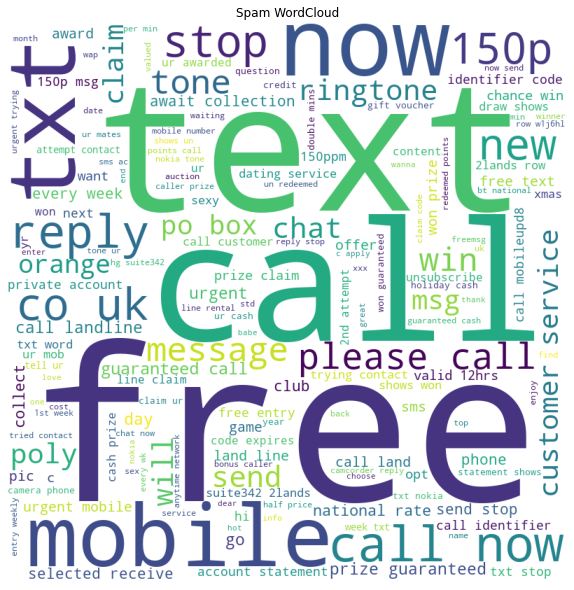

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in data[data.label == 1].mail: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title('Spam WordCloud')
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

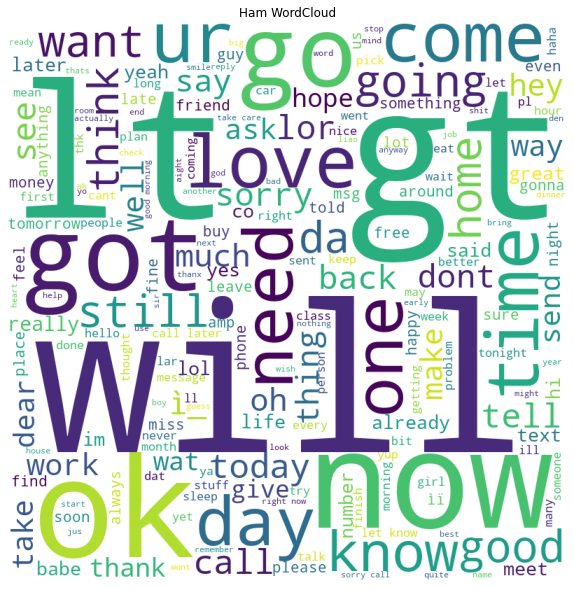

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in data[data.label == 0].mail: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title('Ham WordCloud')
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape Counter({0: 4825, 1: 747})
Resample dataset shape Counter({0: 4825, 1: 4825})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_smote.shape

(9650, 6986)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, shuffle = True, test_size = 0.2)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(7720, 6986) (1930, 6986)
(7720,) (1930,)


In [ ]:
print('Multinomial Naive Bayes')
ab = MultinomialNB()
ab.fit(x_train,y_train)
ypred = ab.predict(x_test)
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

print('Linear Support Vector Classification')
svc = LinearSVC().fit(x_train,y_train)
y_pred = svc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

print('Random Forest Classifier')
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

print('Light Gradient Boosting Machine Classifier')
clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)  
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

print('Extreme Gradient Boosting Classfier')
clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)  
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Multinomial Naive Bayes
0.9787564766839378
[[922  28]
 [ 13 967]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       950
           1       0.97      0.99      0.98       980

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930

Linear Support Vector Classification
0.9979274611398964
[[947   3]
 [  1 979]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       950
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930

Random Forest Classifier
0.9932642487046632
[[950   0]
 [ 13 967]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       950
           1       1.00  

## Undersampling

In [ ]:
rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 4825, 1: 747})
Resample dataset shape Counter({0: 747, 1: 747})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_rus.shape

(1494, 6986)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, shuffle = True, test_size = 0.2)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1195, 6986) (299, 6986)
(1195,) (299,)


In [ ]:
print('Multinomial Naive Bayes')
ab = MultinomialNB()
ab.fit(x_train,y_train)
ypred = ab.predict(x_test)
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

print('Linear Support Vector Classification')
svc = LinearSVC().fit(x_train,y_train)
y_pred = svc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

print('Random Forest Classifier')
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

print('Light Gradient Boosting Machine Classifier')
clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)  
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

print('Extreme Gradient Boosting Classfier')
clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)  
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Multinomial Naive Bayes
0.9765886287625418
[[145   4]
 [  3 147]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       149
           1       0.97      0.98      0.98       150

    accuracy                           0.98       299
   macro avg       0.98      0.98      0.98       299
weighted avg       0.98      0.98      0.98       299

Linear Support Vector Classification
0.9498327759197325
[[148   1]
 [ 14 136]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       149
           1       0.99      0.91      0.95       150

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299

Random Forest Classifier
0.9632107023411371
[[149   0]
 [ 11 139]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       149
           1       1.00  